## Red and White Wine Classification ##
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 <br>
https://www.kaggle.com/piyushagni5/white-wine-quality?select=winequality.names

Parameters:
 - Fixed Acidity. Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
 - Volatile Acidity. The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
 - Citric Acid. Found in small quantities, citric acid can add 'freshness' and flavor to wines.
 - Residual Sugar. The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
 - Chlorides. The amount of salt in the wine.
 - Free Sulfur Dioxide. The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
 - Total Sulfur Dioxide. Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
 - Density. The density of water is close to that of water depending on the percent alcohol and sugar content.
 - pH. Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
 - Sulphates. A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant.
 - Alcohol. The percent alcohol content of the wine.
 - Quality. Output variable (based on sensory data, score between 0 and 10).

### KNN Model :


Makes it so the figures will show in the notebook.

In [227]:
%matplotlib inline

Importing 'pandas', 'pandas_profiling' and 'numpy' to process the dataset.

In [228]:
import pandas as pd
import pandas_profiling
import numpy as np

Importing 'matplotlib', 'scipy.stats' and 'seaborn' to visualize the data.

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [230]:
red_wine_data = pd.read_csv("winequality-red.csv")
white_wine_data = pd.read_csv("winequality-white.csv")

### Correlation ###
Let us find the overall correlation between the different parameters in order to get a better idea about the relationship of similar parameters (such as 'citric acid' and 'fixed acidity') and to confirm our suspicions.

In [231]:
def CorrelationTable(data, title):
    # Compute the correlation matrix:
    pandas_correlation = data.corr()

    # Generating a mask for the upper triangle for a cleaner table:
    mask = np.triu(np.ones_like(pandas_correlation, dtype=bool))

    # Set up the matplotlib figure:
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap:
    cmap = sns.diverging_palette(20, 230, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio:
    sns.heatmap(pandas_correlation, mask=mask, cmap=cmap, vmax=.7, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    # Title:
    plt.title(title)

    plt.show()

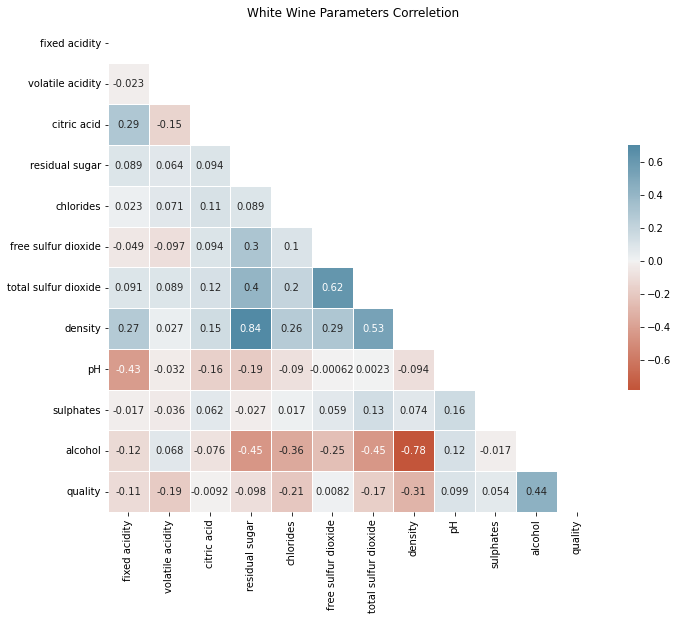

In [232]:
CorrelationTable(white_wine_data, 'White Wine Parameters Correletion')

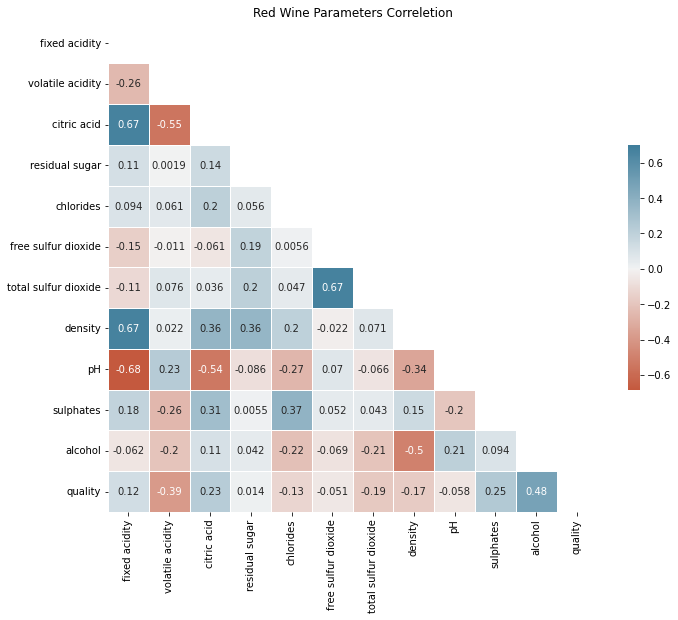

In [233]:
CorrelationTable(red_wine_data, 'Red Wine Parameters Correletion')

Lets use the Pandas Profile Report for a fast analyses:

In [234]:
red_profile = red_wine_data.profile_report(title="Red Wine Report")
red_profile.to_file(output_file="Red Wine Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 40.02it/s]


white_profile = white_wine_data.profile_report(title="White Wine Report")
white_profile.to_file(output_file="White Wine Report.html")

### Lets Merge The Two ###

TODO: Use "data = data.drop(data.index[range(5)])" to make white whine's sample size similar to teh red's. (randomize it first)

In [235]:
red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'

wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True).sample(frac=1)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1035,10.1,0.37,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6,7,red
4198,6.9,0.32,0.27,16.0,0.034,58.0,185.0,0.99938,3.34,0.60,9.0,6,white
3559,8.5,0.17,0.31,1.0,0.024,13.0,91.0,0.99300,2.79,0.37,10.1,5,white
1527,7.1,0.53,0.07,1.7,0.071,15.0,24.0,0.99510,3.29,0.66,10.8,6,red
5281,6.4,0.16,0.44,1.2,0.051,39.0,122.0,0.99058,3.11,0.75,11.3,7,white


The model itself : <br>
In principal, unbalanced classes are not a problem at all for the k-nearest neighbor algorithm. <br>

Because the algorithm is not influenced in any way by the size of the class, it will not favor any on the basis of size. Try to run k-means with an obvious outlier and k+1 and you will see that most of the time the outlier will get its own class.  <br>

Of course, with hard datasets it is always advisable to run the algorithm multiple times. This is to avoid trouble due to a bad initialization.

In [236]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

import statistics

The following method will

In [237]:
def MedianKNN(x, y, k_neighbors, test_portion=0.3, run_count=10, print_flag=False):
    scores = []
    for i in range(0, run_count):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_portion)

        knn = KNeighborsClassifier(k_neighbors)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)

        scores.append(accuracy_score(y_test, y_pred))

        if print_flag:
            print("Classification Report: \n" + classification_report(y_test, y_pred))
            sns.set_context("poster")
            disp = plot_confusion_matrix(knn, x_test, y_test, cmap='cividis', colorbar=False)

    return statistics.median(scores)

Let us find the most consistent k (except k=1 to avoid overfitting):

3


Text(0.5, 1.0, 'Model Accuracy by K Nearest Neighbors')

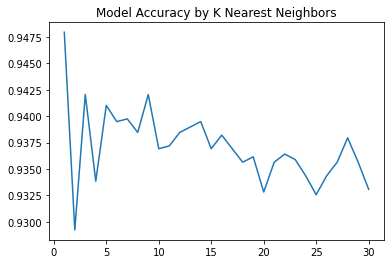

In [238]:
x = wine_data.drop(['type'], axis=1)
y = wine_data['type']

k_neighbors_scores = []
k_neighbors_range = range(1, 31)

for k_neighbors in k_neighbors_range:
    median = MedianKNN(x, y, k_neighbors, 0.3, 20)
    k_neighbors_scores.append(median)

max_score = None
for score in k_neighbors_scores:
    if (k_neighbors_scores.index(score) > 0 and (max_score is None or score > max_score)):
        max_score = score

max_k_neighbors = k_neighbors_scores.index(max_score) + 1

print(max_k_neighbors)

plt.plot(k_neighbors_range, k_neighbors_scores)
plt.title('Model Accuracy by K Nearest Neighbors')

Recall
Precision

Classification Report: 
              precision    recall  f1-score   support

         red       0.90      0.87      0.89       482
       white       0.96      0.97      0.96      1468

    accuracy                           0.94      1950
   macro avg       0.93      0.92      0.92      1950
weighted avg       0.94      0.94      0.94      1950



C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.9441025641025641

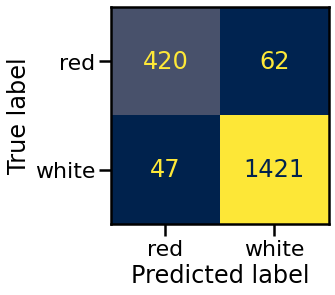

In [239]:
MedianKNN(x, y, max_k_neighbors, 0.3, run_count=1, print_flag=True)

Dummy models

In [240]:
from sklearn.dummy import DummyClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
y_predict = dummy_clf.predict_proba(x_test)
dummy_score = dummy_clf.score(x_test, y_test)
print(dummy_score)

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_train, y_train)
y_predict = dummy_clf.predict_proba(x_test)
dummy_score = dummy_clf.score(x_test, y_test)
print(dummy_score)

0.7533333333333333
0.6256410256410256


### Random Forest Model : 

In [241]:
from sklearn import datasets
import numpy as np
import pandas as pd

red_wine_data = pd.read_csv("winequality-red.csv")
white_wine_data = pd.read_csv("winequality-white.csv")

red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'

wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True).sample(frac=1)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6259,6.6,0.33,0.41,2.0,0.027,14.0,79.0,0.99063,3.27,0.63,12.4,6,white
2051,5.9,0.46,0.14,2.7,0.042,27.0,160.0,0.99310,3.46,0.51,10.6,7,white
4204,7.1,0.20,0.30,0.9,0.019,4.0,28.0,0.98931,3.20,0.36,12.0,6,white
5213,6.4,0.38,0.24,7.2,0.047,41.0,151.0,0.99604,3.11,0.60,9.2,5,white
1934,6.3,0.23,0.30,1.8,0.033,16.0,91.0,0.99060,3.28,0.40,11.8,6,white


Dividing the data to dependent (x) and independent (y) and balacing it

In [242]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
ros = RandomOverSampler(random_state=42)
x = wine_data.drop(['type'], axis=1)
y = wine_data[['type']]
x_trainun, x_testun, y_trainun, y_testun = train_test_split(x, y, test_size=0.3)
x_train,y_train = ros.fit_resample(x_trainun,y_trainun)
x_test,y_test = ros.fit_resample(x_testun,y_testun)

x_trainun, x_testun, y_trainun, y_testun = train_test_split(x, y, test_size=0.3)

Importing the RandomForest classifier and training

In [243]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

C:\Users\Tamir\AppData\Local\Temp\ipykernel_4192\3627081326.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)


A function to check the median accuracy of the classifier

In [244]:
import statistics
def MedianAccuracy():
    MyList = []
    for i in range (1,31):  
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
        clf=RandomForestClassifier(n_estimators=100)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        MyList.append(metrics.accuracy_score(y_test, y_pred))
       
       
    print(statistics.median(MyList))

Printing the accuracy of the classifier

In [245]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9918311776718857


Fidining the impact of each feature on the prediction

In [246]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=1)

features = ['fixed acidity' ,	'volatile acidity',	'citric acid'	,'residual sugar'	,'chlorides'	,'free sulfur dioxide'	,'total sulfur dioxide'	,'density'	,'pH'	,'sulphates'	,'alcohol'	,'quality']
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

C:\Users\Tamir\AppData\Local\Temp\ipykernel_4192\2145055434.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train,y_train)


total sulfur dioxide    0.304078
chlorides               0.264164
volatile acidity        0.122811
density                 0.073329
sulphates               0.062170
residual sugar          0.059157
free sulfur dioxide     0.054709
fixed acidity           0.019989
pH                      0.014929
citric acid             0.011165
alcohol                 0.009617
quality                 0.003881
dtype: float64

Visualizing the impact of each feature on the prediction

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


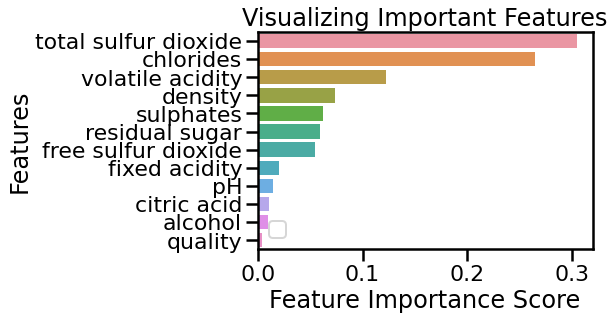

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Conclusion - Since quality is not an important feature, as it's importantance is very low, we can remove it to reduce the training time

In [248]:
x = wine_data[['fixed acidity' ,	'volatile acidity',	'citric acid'	,'residual sugar'	,'chlorides'	,'free sulfur dioxide'	,'total sulfur dioxide'	,'density'	,'pH'	,'sulphates'	,'alcohol'	]]
y = wine_data['type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9953846153846154


Importing 'pandas', 'pandas_profiling' and 'numpy' to process the dataset.

In [249]:
import pandas as pd
import pandas_profiling
import numpy as np

Importing 'matplotlib', 'scipy.stats' and 'seaborn' to visualize the data.

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [251]:
red_wine_data = pd.read_csv("winequality-red.csv")
white_wine_data = pd.read_csv("winequality-white.csv")

### Correlation ###
Let us find the overall correlation between the different parameters in order to get a better idea about the relationship of similar parameters (such as 'citric acid' and 'fixed acidity') and to confirm our suspicions.

In [252]:
def CorrelationTable(data, title):
    # Compute the correlation matrix:
    pandas_correlation = data.corr()

    # Generating a mask for the upper triangle for a cleaner table:
    mask = np.triu(np.ones_like(pandas_correlation, dtype=bool))

    # Set up the matplotlib figure:
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap:
    cmap = sns.diverging_palette(20, 230, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio:
    sns.heatmap(pandas_correlation, mask=mask, cmap=cmap, vmax=.7, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    # Title:
    plt.title(title)

    plt.show()

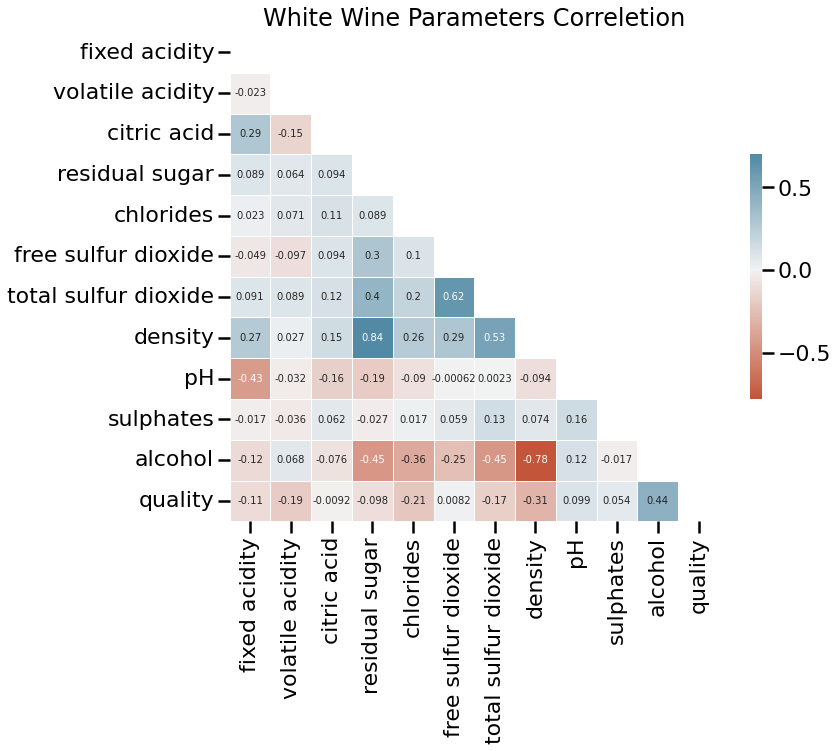

In [253]:
CorrelationTable(white_wine_data, 'White Wine Parameters Correletion')

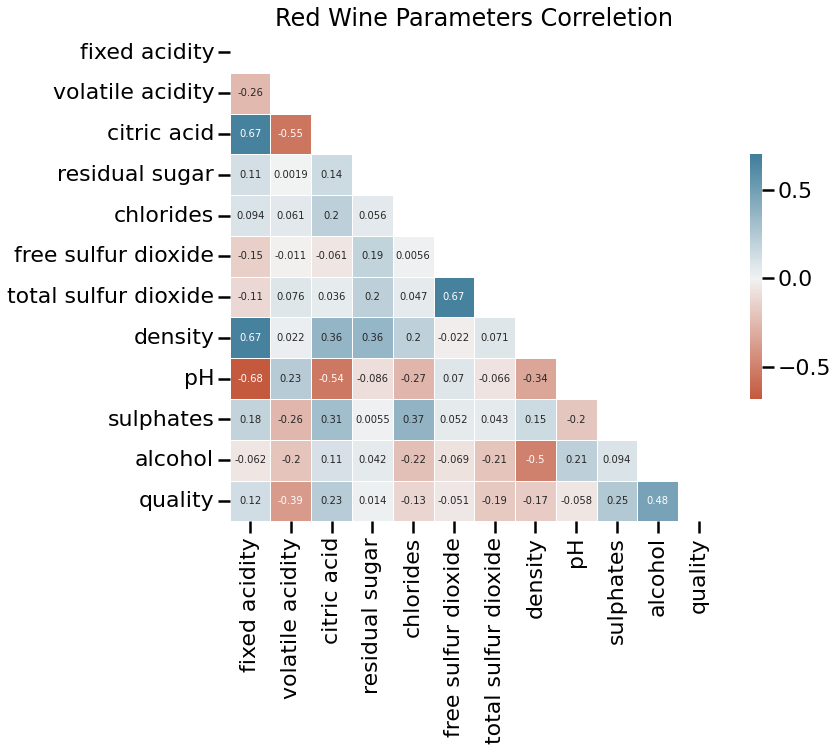

In [254]:
CorrelationTable(red_wine_data, 'Red Wine Parameters Correletion')

Lets use the Pandas Profile Report for a fast analyses:

In [255]:
red_profile = red_wine_data.profile_report(title="Red Wine Report")
red_profile.to_file(output_file="Red Wine Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 40.00it/s]


In [256]:
white_profile = white_wine_data.profile_report(title="White Wine Report")
white_profile.to_file(output_file="White Wine Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 35.73it/s]


### Lets Merge The Two ###

TODO: Use "data = data.drop(data.index[range(5)])" to make white whine's sample size similar to teh red's. (randomize it first)

In [257]:
red_wine_data['type'] = 1
white_wine_data['type'] = 0

wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True).sample(frac=1)
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2227,7.0,0.32,0.24,6.2,0.048,31.0,228.0,0.99570,3.23,0.62,9.4,6,0
5402,7.2,0.17,0.34,6.4,0.042,16.0,111.0,0.99278,2.99,0.40,10.8,6,0
3311,7.9,0.18,0.37,3.0,0.061,25.0,178.0,0.99500,3.22,0.51,10.0,6,0
2190,7.3,0.20,0.37,1.2,0.037,48.0,119.0,0.99200,3.32,0.49,10.9,6,0
5415,6.8,0.41,0.30,8.8,0.045,28.0,131.0,0.99530,3.12,0.59,9.9,5,0


### Starting prediction using Logistic Regression ###
First of all, we import all the important libaries.

In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
#sns.pairplot(wine_data)
#sns.scatterplot(x='volatile acidity',y='alcohol', data = red_wine_data)
#print(sns.scatterplot(x='fixed acidity', y='quality', data=wine_data))


Starting by making tables with logical relations.
(Simple differences between Whie/Red wine using general knowledge and wikipedia)

C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expand

array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='type', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity',

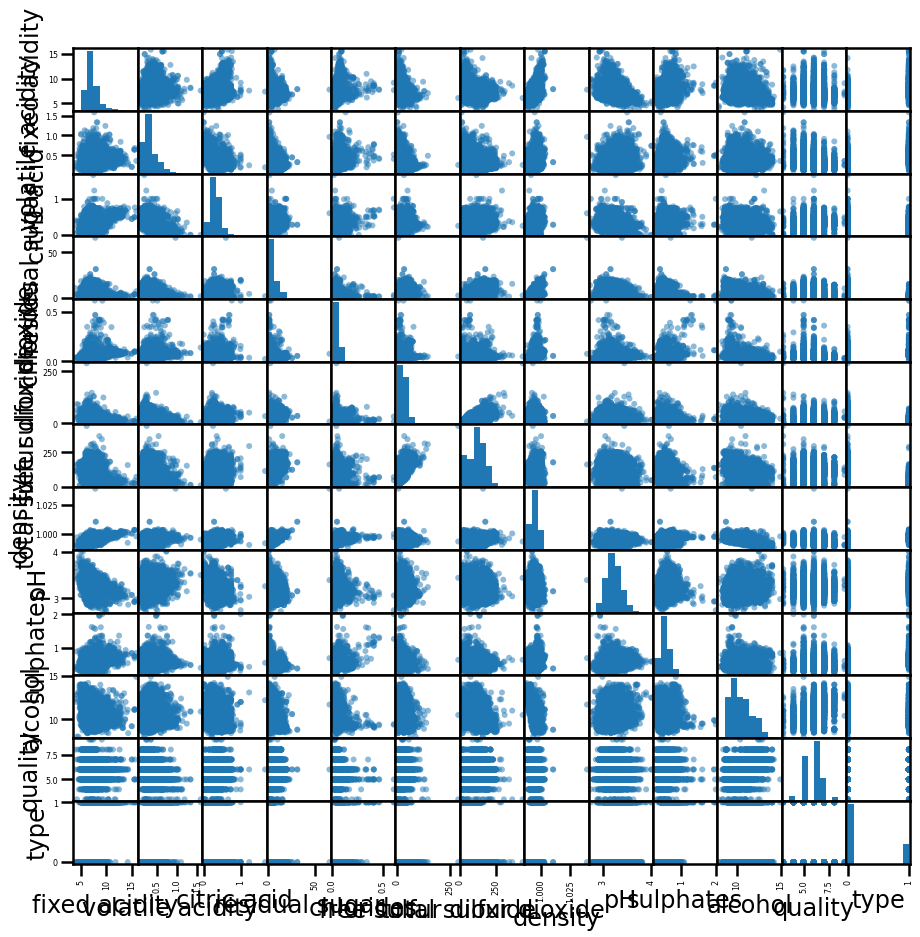

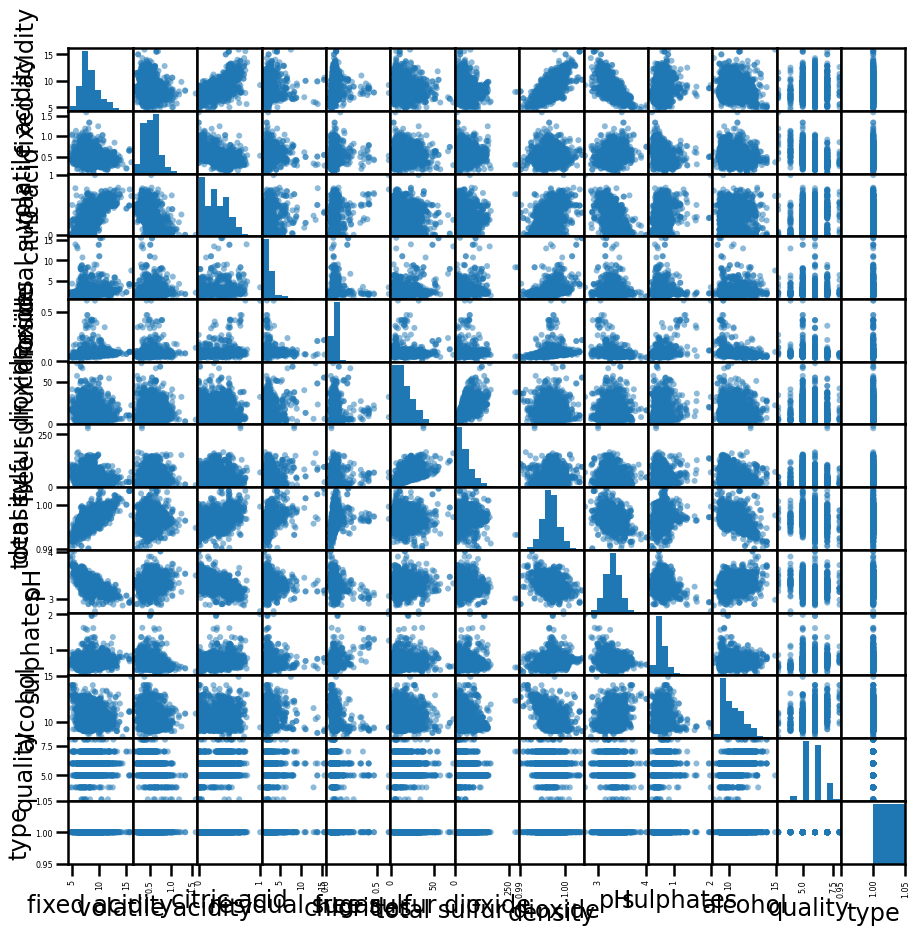

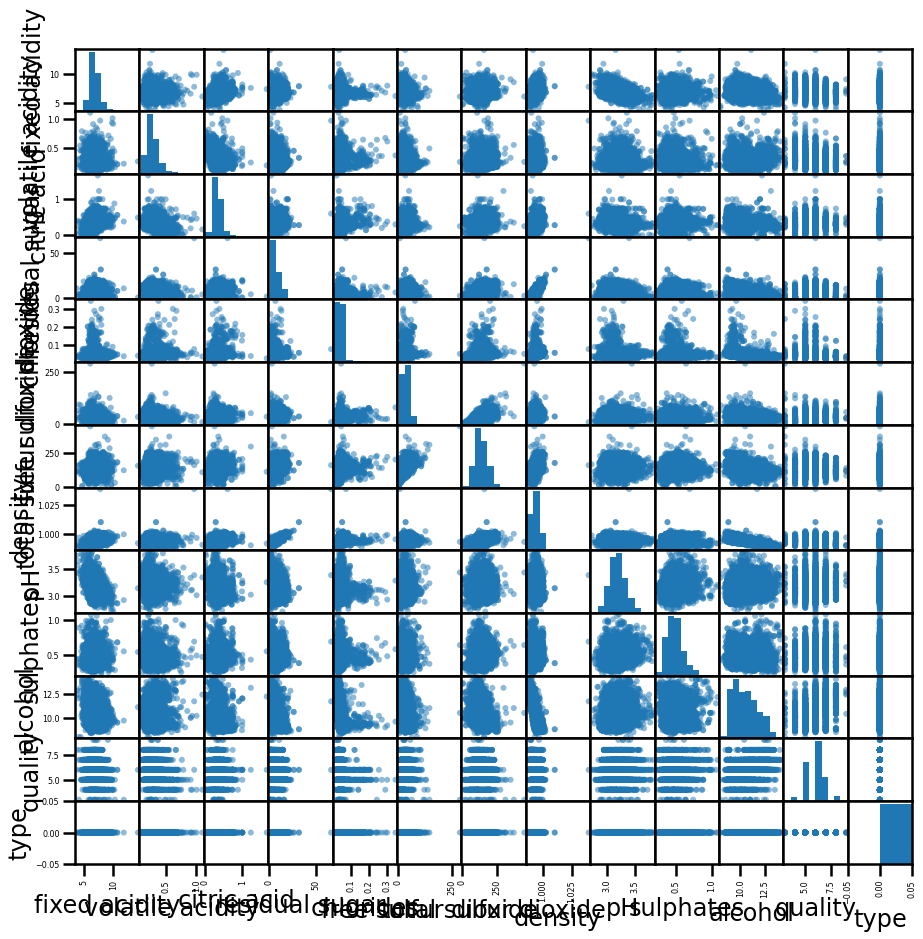

In [259]:
pd.plotting.scatter_matrix(wine_data, figsize = (15,15))
pd.plotting.scatter_matrix(red_wine_data, figsize = (15,15))
pd.plotting.scatter_matrix(white_wine_data, figsize = (15,15))

First - we noticed the difference in graphs between volatile acidity and alcohol in red vs white wine.

<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

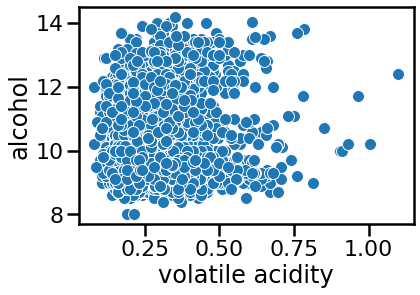

In [260]:
sns.scatterplot(x='volatile acidity',y='alcohol', data = white_wine_data)

<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

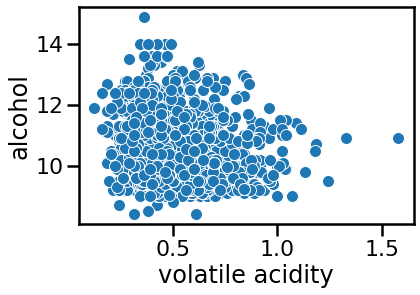

In [261]:
sns.scatterplot(x='volatile acidity',y='alcohol', data = red_wine_data)

Fixed acidity vs type in both wines

<AxesSubplot:xlabel='fixed acidity', ylabel='type'>

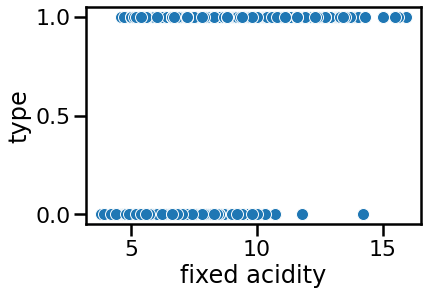

In [262]:
sns.scatterplot(x='fixed acidity', y='type', data=wine_data)

After realizing some of the connections and differences between red and white wine, we use a heatmap corrolation map in order to find exact corrolations.
(Rendering both the red wine heatmap and white wine heatmap)

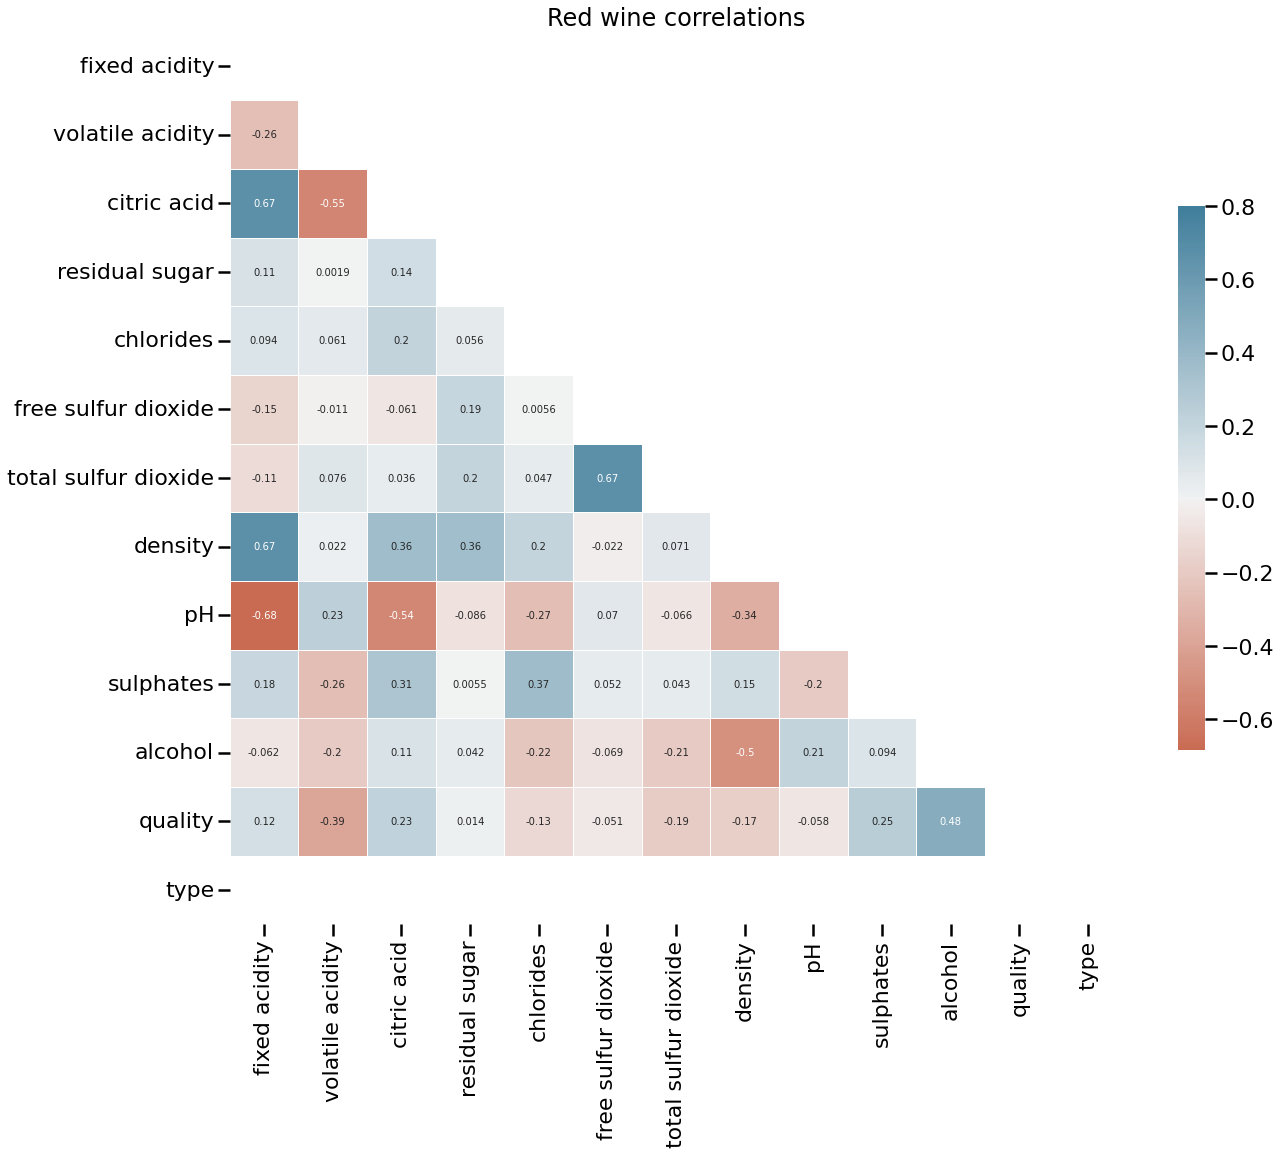

In [263]:
def CorrelationTable(data, title):
    # Compute the correlation matrix:
    pandas_correlation = data.corr()

    # Generating a mask for the upper triangle for a cleaner table:
    mask = np.triu(np.ones_like(pandas_correlation, dtype=bool))

    # Set up the matplotlib figure:
    f, ax = plt.subplots(figsize=(20, 20))

    # Generate a custom diverging colormap:
    cmap = sns.diverging_palette(20, 230, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio:
    sns.heatmap(pandas_correlation, mask=mask, cmap=cmap, vmax=.8, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    # Title:
    plt.title(title)

    plt.show()


CorrelationTable(red_wine_data,"Red wine correlations")


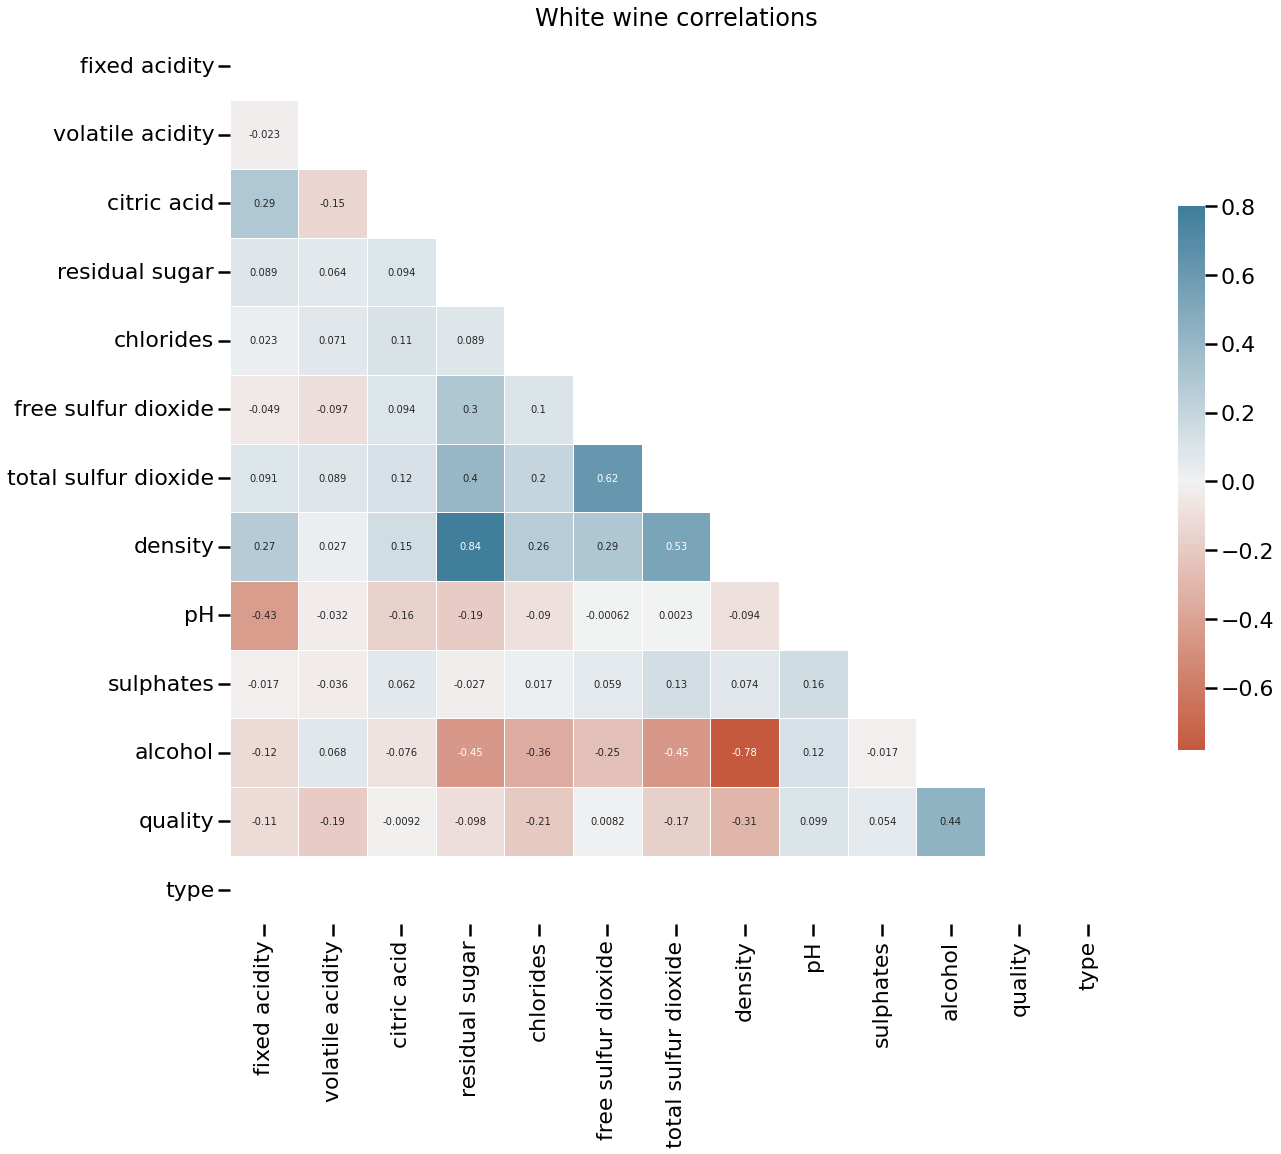

In [264]:
CorrelationTable(white_wine_data,"White wine correlations")

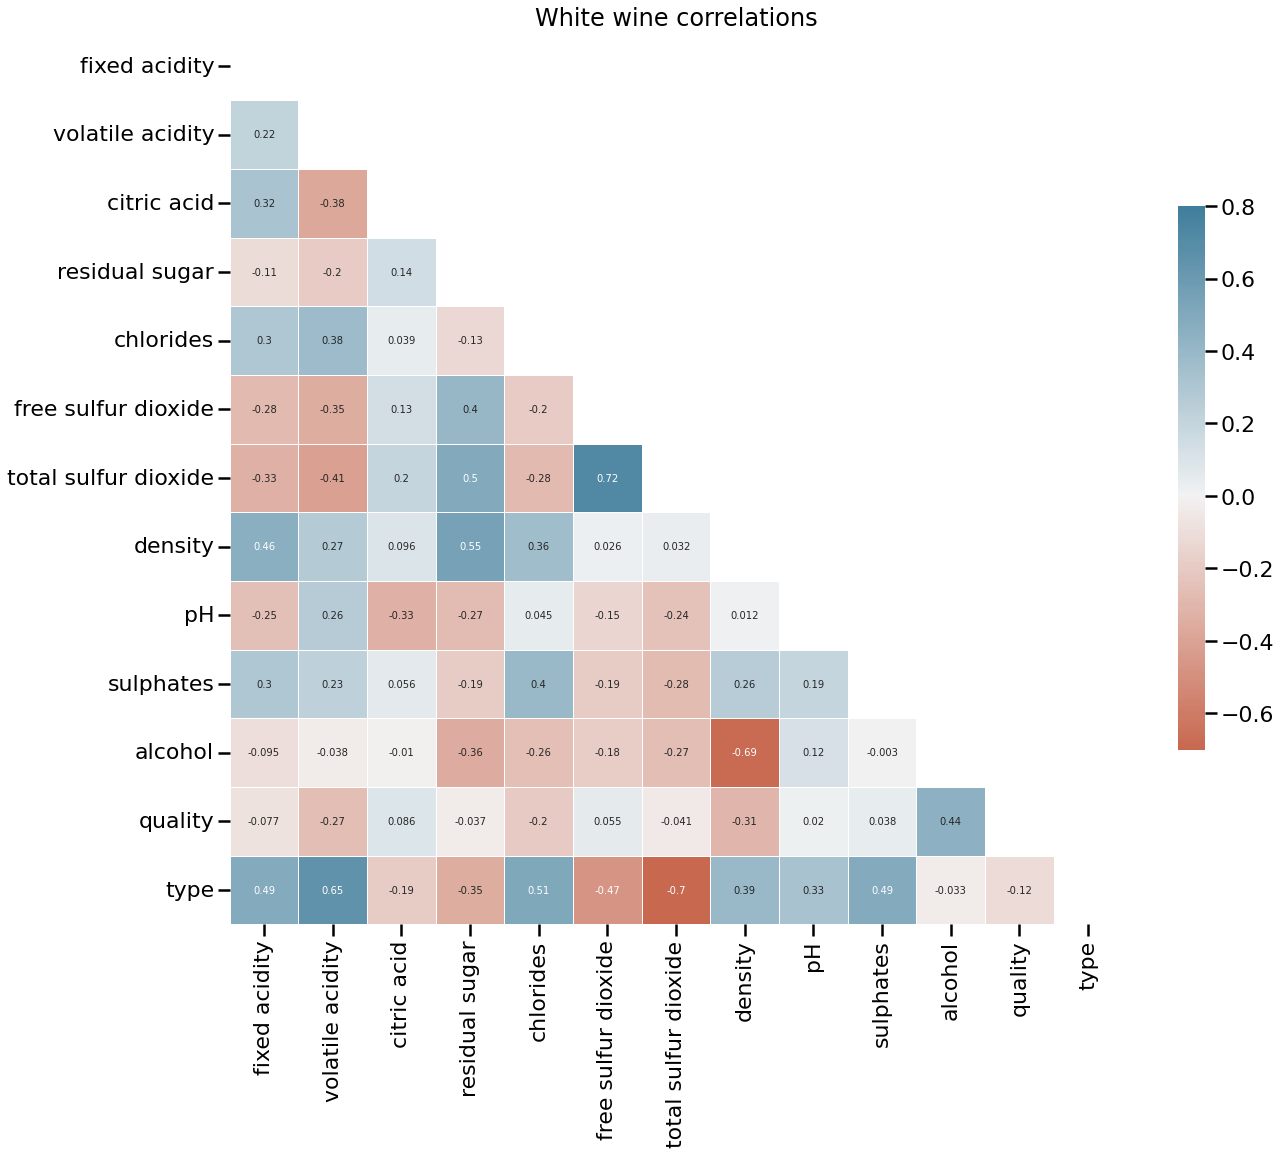

In [265]:
CorrelationTable(wine_data,"White wine correlations")

From this we can learn there is a high corrolation between type and total sulfur dioxide and volatile acidity. in picking if its white wine or red wine

### Building the model ###
We get rid of quality and type.<br>
<br>Quality because its subjective and doesn't connect in any way to our prediction.
<br>Type because we dont want the model to know what type of wine it is, before the prediction.
<br><br>
We will build 3 models.<br>
1 model with a non-balanced model.<br>
1 model with a balanced dataset using the class_weight function in the LogisticRegression function from sklearn.<br>
1 model with a balanced dataset using the imblearn.over_sampling function from RandomOverSampler.<br>


### Model 1 - Unbalanced model <br>
While this model looks good, it is VERY VERY BAD AND INACCURATE.<br>
In this particular run, we actually got samples from both red and white wine.<br>
However, because it is random there might be a run where it will only get samples from white wine/red wine which will create an inaccurate prediction.<br>

In [266]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=42, shuffle=True)
x_unbalanced=wine_data.drop(['quality','type'],axis=1)
y_unbalanced=wine_data['type']

In [267]:
from sklearn.model_selection import train_test_split
x_unbalanced_train, x_unbalanced_test, y_unbalanced_train, y_unbalanced_test =train_test_split(x_unbalanced,y_unbalanced,test_size=0.20,random_state=42)

In [268]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_unbalanced_train , y_unbalanced_train)
PredictNoBalance = model.predict(x_unbalanced_test)
score = model.score(x_unbalanced_test,y_unbalanced_test)
RegressionCrossValUnBalanced = cross_val_score(model, x_unbalanced_train,y_unbalanced_train, cv=kf, scoring='accuracy').mean()
print(RegressionCrossValUnBalanced)


0.9842196531791908


In [269]:
from sklearn.metrics import classification_report
print(classification_report(y_unbalanced_test, PredictNoBalance))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.96      0.98       334

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.99      1300
weighted avg       0.99      0.99      0.99      1300



### Model 2 - balanced model using the "class_weight" argument in logisticregression <br>
This model is actually really good!<br>
The data is balanced, and the predictions are quite good.<br>
However, it can be EVEN better, with a better data balancing algorithm.<br>

In [270]:
x_reg_balance=wine_data.drop(['quality','type'],axis=1)
y_reg_balance=wine_data['type']

In [271]:
from sklearn.model_selection import train_test_split
x_reg_balance_train, x_reg_balance_test, y_reg_balance_train, y_reg_balance_test = train_test_split(x_reg_balance,y_reg_balance,test_size=0.20,random_state=42)


In [272]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced',solver='lbfgs', max_iter=1000)
model.fit(x_reg_balance_train , y_reg_balance_train)
PredictRegBalance = model.predict(x_reg_balance_test)

model.score(x_reg_balance_test,y_reg_balance_test)

RegressionCrossValBalance = cross_val_score(model, x_reg_balance_train,y_reg_balance_train, cv=kf, scoring='accuracy').mean()
print(RegressionCrossValBalance)

C:\Users\Tamir\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9809496813398548


In [273]:
from sklearn.metrics import classification_report
print(classification_report(y_reg_balance_test, PredictRegBalance))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.98      0.97       334

    accuracy                           0.99      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300



### Model 3 - balanced model using the RandomOverSampler libary from imblearn<br>
By correcting our data using oversampling we can achieve a higher level of accuracy in the model.
This is the best model out of the bunch<br>
The data is balanced, and the predictions are almost perfect with a 99% score.<br>

In [274]:
x_start=wine_data.drop(['quality','type'],axis=1)
y_start=wine_data['type']

In [275]:
from sklearn.model_selection import train_test_split
x_normal_train, x_normal_test, y_normal_train, y_normal_test =train_test_split(x_start,y_start,test_size=0.2,random_state=0)

In [276]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_train_resampled,y_train_resampled = ros.fit_resample(x_normal_train,y_normal_train)
x_test_resampled,y_test_resampled = ros.fit_resample(x_normal_test,y_normal_test)


In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import numpy as np
model=LogisticRegression(solver='lbfgs', max_iter=10000)
fitted = model.fit(x_train_resampled,y_train_resampled)
fitted2 = model.fit(x_normal_train,y_normal_train)
predictBalance = model.predict(x_normal_test)
model.score(x_normal_test,y_normal_test)
print(x_test_resampled.shape, y_normal_train.shape)
lr = LogisticRegression(max_iter=10000)

RegressionCrossVal = cross_val_score(lr, x_normal_train,y_normal_train, cv=kf, scoring='accuracy').mean()
print(RegressionCrossVal)

(1956, 11) (5197,)
0.9846057507040167


In [278]:
from sklearn.metrics import classification_report
print(classification_report(y_normal_test, predictBalance))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       978
           1       0.98      0.97      0.98       322

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300



### Time for some metrics!

### First let us make an ROC curve
We can see that the curve starts at 0.9~ and only goes up.

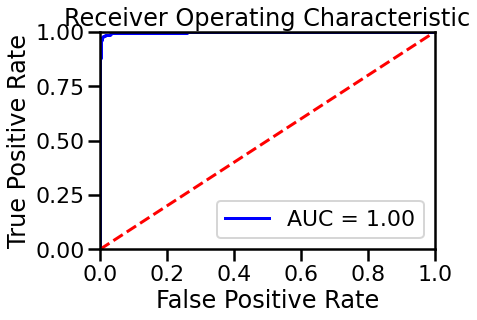

In [279]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
import matplotlib.pyplot as plt
probs = model.predict_proba(x_normal_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_normal_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Dummy models!<br>

Here we run dummy models in order to sanity check our results.<br>
we see that unsuprisingly the first dummy model "most_frequent" gets a constant result of 0.75%<br>
This is easily explained by the fact that we have 5x more red wine samples than white wine.<br>
<br>
The second dummy model, "stratified" is abit more complex.<br>
However it gives even worse results than the first model and it isn't constant.<br>

In [280]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_normal_train, y_normal_train)
y_predict = dummy_clf.predict_proba(x_normal_test)
dummy_score = dummy_clf.score(x_normal_test, y_normal_test)
print(dummy_score)

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_normal_train, y_normal_train)
y_predict = dummy_clf.predict_proba(x_normal_test)
dummy_score = dummy_clf.score(x_normal_test, y_normal_test)
print(dummy_score)


0.7523076923076923
0.6176923076923077


### For fun lets try a few more algorithms<br>

All algorithms were run on the UNBALANCED dataset.<br>
suprisingly while Naive Bayes and Adaboostclassifier (which is also just a boost classifier) ran very well despite not being optimised for unbalanced datasets.<br>
Another suprising result is that of SVM, which is an algorithm with a tendecy to be more accurate in non-balanced datasets.<br>

In [282]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

models = []
models.append(('SVM:',SVC()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model,x_normal_train,y_normal_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)




SVM: 93.34255965614346
Naive Bayes: 97.1521416926041
Decision Tree: 98.4030309767304
AdaBoostClassifier: 99.26878612716766
